# Preview

This Notebook contains some useful references of codes, papers and github projects.

In [7]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 432 kB 5.2 MB/s 
     |████████████████████████████████| 13.7 MB 44.1 MB/s 
     |████████████████████████████████| 3.5 MB 41.8 MB/s 
     |████████████████████████████████| 1.2 MB 30.5 MB/s 
     |████████████████████████████████| 622 kB 48.5 MB/s 
     |████████████████████████████████| 6.0 MB 30.4 MB/s 
     |████████████████████████████████| 1.6 MB 38.9 MB/s 
     |████████████████████████████████| 181 kB 55.1 MB/s 
     |████████████████████████████████| 10.1 MB 43.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 451 kB 34.1 MB/s 
     |████████████████████████████████| 628 kB 57.6 MB/s 
     |████████████████████████████████| 174 kB 55.7 MB/s 
     |████████████████████████████████| 5.9 MB 35.5 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 6.8 MB 24.6 MB/s 
     |███████████

# Keyword Extraction
https://paperswithcode.com/task/keyword-extraction


# Pre train models

Spanish word embbedings (fasttext,w2v,glove):https://github.com/dccuchile/spanish-word-embeddings

# Architectures

NLP 2020 ROADMAP: https://www.analyticsvidhya.com/blog/2020/01/learning-path-nlp-2020/?utm_source=blog&utm_medium=Natural_Language_Generation_System_using_PyTorch


## Transformers
Def: https://www.factored.ai/2021/09/21/an-intuitive-explanation-of-transformer-based-models/

Fine tuning BERT w/ Pytorch: https://mccormickml.com/2019/07/22/BERT-fine-tuning/

Fine tuning BERT for SA: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/

BERT for text clasification: https://www.analyticsvidhya.com/blog/2021/06/why-and-how-to-use-bert-for-nlp-text-classification/

BETO paper: https://users.dcc.uchile.cl/~jperez/papers/pml4dc2020.pdf

BertViz, Visualize Attention in Transformer Models: 


*   https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77
*   https://github.com/jessevig/bertviz
* https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1




### NLP tasks

Natural language processing is transforming the way we analyze and interact with language-based data by training machines to make sense of text and speech, and perform automated tasks like translation, summarization, classification, and extraction.

#### Spanish text generation

In [8]:
##Ejemplo generación de texto
from transformers import pipeline

generator = pipeline("text-generation", model="DeepESP/gpt2-spanish")
generator(
    "Quisiera saber que va a suceder",
    max_length=30,
    num_return_sequences=2,
)

Downloading:   0%|          | 0.00/914 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/821k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/262 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Quisiera saber que va a sucederte algo malo. \n\n—¿Qué clase de maldición os ha sorprendido a vosotros? —insisto. \n\n—'},
 {'generated_text': 'Quisiera saber que va a suceder algo, lo que hará feliz al mundo, aunque haya otras posibilidades. \n\n—Hay más, creo, porque a'}]

#### BETO Sentiment Analysis

In [9]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("finiteautomata/beto-emotion-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/beto-emotion-analysis")

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/950 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

In [10]:
raw_inputs = [
    "estoy muy bien de haber terminado  con mi pareja",
    "Odio las peliculas de terror!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")

outputs = model(**inputs)

In [11]:
print(outputs.logits.shape)

torch.Size([2, 7])


In [12]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[3.1658e-02, 9.5757e-01, 3.4041e-03, 4.2901e-04, 4.7565e-03, 1.0208e-03,
         1.1592e-03],
        [3.2667e-02, 1.0575e-02, 7.1855e-03, 9.7133e-02, 4.8205e-02, 9.8597e-02,
         7.0564e-01]], grad_fn=<SoftmaxBackward0>)


In [13]:
model.config.id2label

{0: 'others',
 1: 'joy',
 2: 'sadness',
 3: 'anger',
 4: 'surprise',
 5: 'disgust',
 6: 'fear'}

#### NER

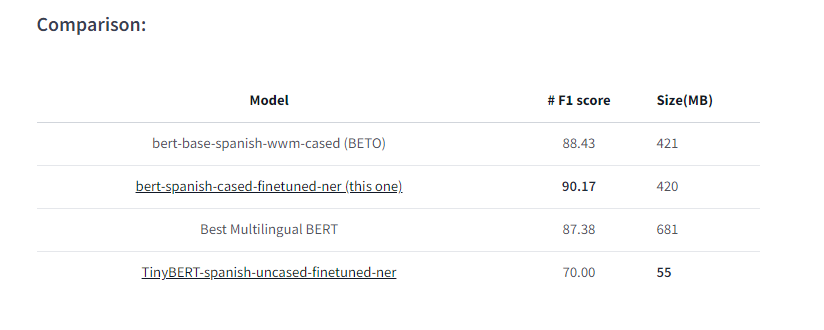

In [14]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
#Mejor modelo entrenado con CONLL Corpora ES
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert-spanish-cased-finetuned-ner")

model = AutoModelForTokenClassification.from_pretrained("mrm8488/bert-spanish-cased-finetuned-ner")

Downloading:   0%|          | 0.00/136 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/237k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

In [15]:
inputs = [
'La formacion en estas tematicas y un apoyo familiar importante ya que muchas mujeres no participan mas en estas instancias de liderazgo porque tienen una carga de trabajo y en sus hogares',    
"acerca de la mujer como foco	Promover investigacion exclusiva para y sobre mujeres",
"Dar cuotas especiales para concursos academicos y becas Asegurar cuotas equitativas para proyectos como Fondecyt"
]
inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")

outputs = model(**inputs)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [16]:
print(outputs.logits.shape)

torch.Size([3, 36, 9])


In [17]:
model.config.id2label

{0: 'B-LOC',
 1: 'B-MISC',
 2: 'B-ORG',
 3: 'B-PER',
 4: 'I-LOC',
 5: 'I-MISC',
 6: 'I-ORG',
 7: 'I-PER',
 8: 'O'}

In [18]:
import torch
from transformers import AutoModelForTokenClassification, AutoTokenizer

id2label = {
    "0": "B-LOC",
    "1": "B-MISC",
    "2": "B-ORG",
    "3": "B-PER",
    "4": "I-LOC",
    "5": "I-MISC",
    "6": "I-ORG",
    "7": "I-PER",
    "8": "O"
}

tokenizer = AutoTokenizer.from_pretrained('mrm8488/bert-spanish-cased-finetuned-ner')
model = AutoModelForTokenClassification.from_pretrained('mrm8488/bert-spanish-cased-finetuned-ner')
text ="Dar cuotas especiales para concursos academicos y becas asegurar cuotas equitativas para proyectos como Fondecyt"
input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)

outputs = model(input_ids)
last_hidden_states = outputs[0]

for m in last_hidden_states:
  for index, n in enumerate(m):
    if(index > 0 and index <= len(text.split(" "))):
      print(text.split(" ")[index-1] + ": " + id2label[str(torch.argmax(n).item())])
      

Dar: O
cuotas: O
especiales: O
para: O
concursos: O
academicos: O
y: O
becas: O
asegurar: O
cuotas: O
equitativas: O
para: O
proyectos: O
como: O
Fondecyt: O


### BERT
Def: 
* https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/
* https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

BERT in tf: https://github.com/google-research/bert

## LSTM / Seq2Seq
Natural Language Generation using PyTorch: https://www.analyticsvidhya.com/blog/2020/08/build-a-natural-language-generation-nlg-system-using-pytorch/

Example :https://cnvrg.io/seq2seq-model/

Sentiment Classification Using fastText Embedding and Deep Learning Model: https://www.sciencedirect.com/science/article/pii/S187705092101228X

## W2V/ GloVE / FastTest (Word embeddings)
Def: https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

Backprop explained:http://www.claudiobellei.com/2018/01/06/backprop-word2vec/#multi-word-cbow

NEG: https://towardsdatascience.com/nlp-101-negative-sampling-and-glove-936c88f3bc68

More words embedding: https://medium.com/analytics-vidhya/word-embeddings-in-nlp-word2vec-glove-fasttext-24d4d4286a73

